In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

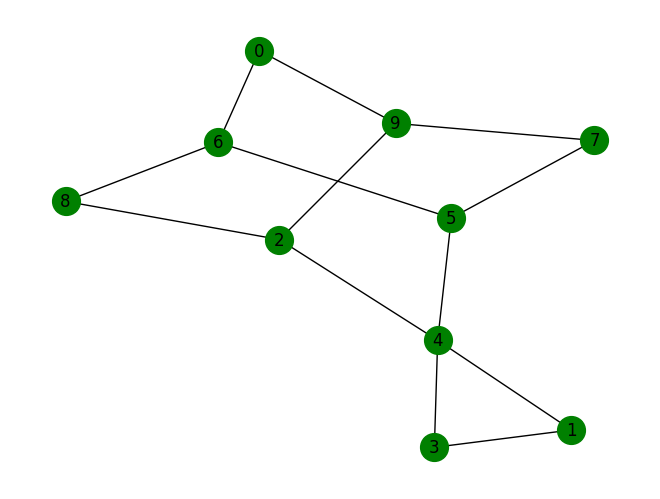

In [2]:
#Geração do grafo - Abertura de arquivo
G = nx.read_edgelist("grafo.txt", delimiter=',')
nx.draw(G, with_labels = True, node_color='green', node_size=400)

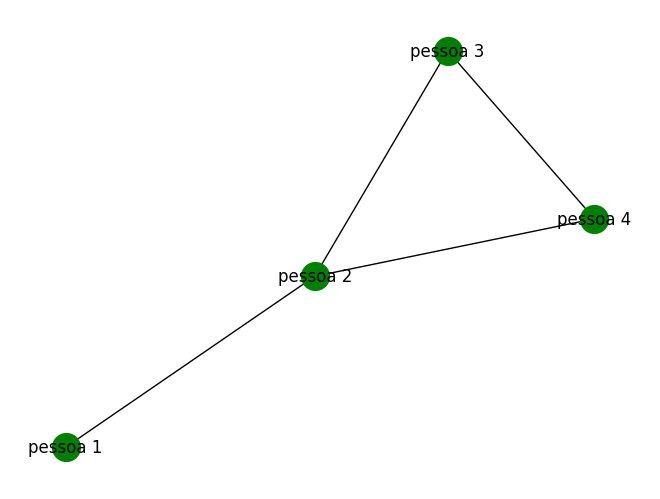

In [20]:
#Geração do grafo - Declarando o grafo
G = nx.Graph()
G.add_edge('pessoa 1','pessoa 2')
G.add_edge('pessoa 2','pessoa 3')
G.add_edge('pessoa 3','pessoa 4')
G.add_edge('pessoa 2','pessoa 4')

nx.draw(G, with_labels = True, node_color='green', node_size=400)

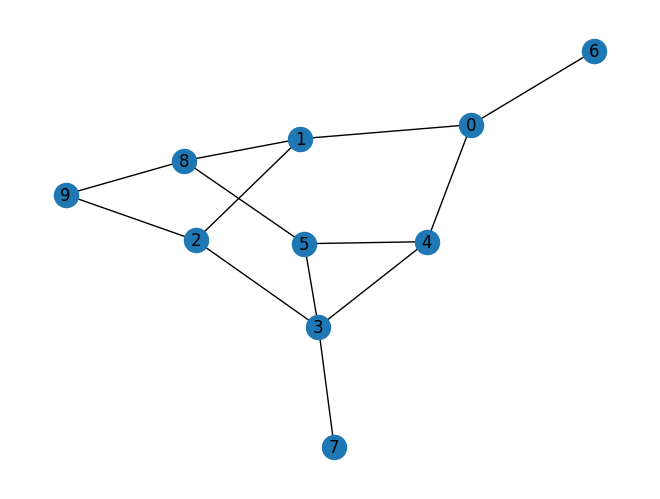

In [17]:
#Geração do grafo - Gerando um grafo randômico

vertices = 10
prob = 0.3
G = nx.erdos_renyi_graph(vertices, prob)
nx.draw(G, with_labels=True)

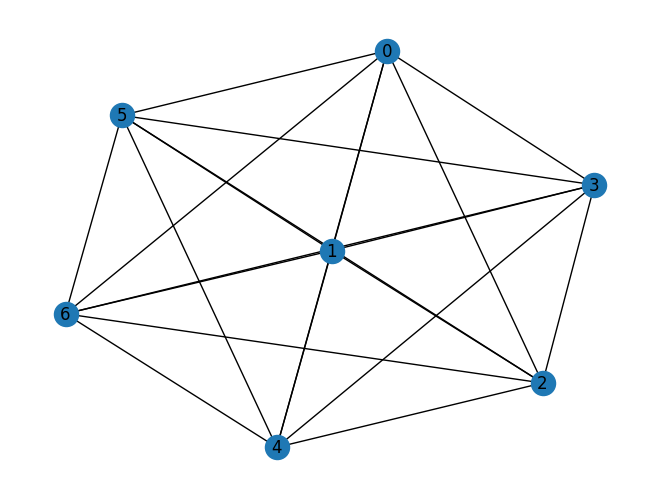

In [4]:
#Suporte para criação de grafos específicos

H = nx.complete_graph(7)

nx.draw(H, with_labels=True)

In [8]:
#Informações do grafo criado

#print(G.size())                    #Número vértices
#nx.find_cycle(G)                  #Ciclo
#nx.triangles(G)                   #Trinagulos
#nx.greedy_color(G)                #Colorindo o grafo
nx.number_connected_components(G) #Número de componentes

1

In [9]:
#Todos os fechamentos triadicos possíveis

possiveis_fechamento_triadico = []

#Verifica cada par de vértices u e v
for u in G.nodes():
    for v in G.nodes():
        #Se os vértices são distintos e não estão conectados
        if u != v and not G.has_edge(u, v):
            # Encontrando os vizinhos comuns
            vizinhos_comuns = list(nx.common_neighbors(G, u, v))
            if vizinhos_comuns:
                possiveis_fechamento_triadico.append((u, v, vizinhos_comuns))

# Imprimir as arestas sugeridas para fechamento triádico
for aresta in possiveis_fechamento_triadico:
    print(f"Aresta sugerida entre {aresta[0]} e {aresta[1]}, vizinhos comuns: {aresta[2]}")

Aresta sugerida entre 0 e 2, vizinhos comuns: [3, 4]
Aresta sugerida entre 0 e 5, vizinhos comuns: [4]
Aresta sugerida entre 0 e 6, vizinhos comuns: [3]
Aresta sugerida entre 0 e 7, vizinhos comuns: [3]
Aresta sugerida entre 1 e 3, vizinhos comuns: [6]
Aresta sugerida entre 1 e 5, vizinhos comuns: [6]
Aresta sugerida entre 1 e 9, vizinhos comuns: [8]
Aresta sugerida entre 2 e 0, vizinhos comuns: [3, 4]
Aresta sugerida entre 2 e 6, vizinhos comuns: [3, 5]
Aresta sugerida entre 2 e 9, vizinhos comuns: [7]
Aresta sugerida entre 3 e 1, vizinhos comuns: [6]
Aresta sugerida entre 3 e 5, vizinhos comuns: [2, 4, 6]
Aresta sugerida entre 3 e 9, vizinhos comuns: [7]
Aresta sugerida entre 4 e 6, vizinhos comuns: [3, 5]
Aresta sugerida entre 4 e 7, vizinhos comuns: [2, 3]
Aresta sugerida entre 5 e 0, vizinhos comuns: [4]
Aresta sugerida entre 5 e 1, vizinhos comuns: [6]
Aresta sugerida entre 5 e 3, vizinhos comuns: [2, 4, 6]
Aresta sugerida entre 5 e 7, vizinhos comuns: [2]
Aresta sugerida entre 6

In [10]:
# Fechamento triádico do grafo
fechamento_triadico = nx.transitivity(G)

print("Fechamento Triádico: ", fechamento_triadico)

Fechamento Triádico:  0.34285714285714286


In [12]:
#Coeficiente de clusterização de cada vértice
cluster_coeficientes = nx.clustering(G)
print(cluster_coeficientes)

for vertice, coeficiente in cluster_coeficientes.items():
    print(f"Vértice {vertice}: Coeficiente de Clusterização = {coeficiente}")


{0: 1.0, 1: 0, 2: 0.5, 3: 0.3, 4: 0.5, 5: 0.3333333333333333, 6: 0, 7: 0.3333333333333333, 8: 0, 9: 0}
Vértice 0: Coeficiente de Clusterização = 1.0
Vértice 1: Coeficiente de Clusterização = 0
Vértice 2: Coeficiente de Clusterização = 0.5
Vértice 3: Coeficiente de Clusterização = 0.3
Vértice 4: Coeficiente de Clusterização = 0.5
Vértice 5: Coeficiente de Clusterização = 0.3333333333333333
Vértice 6: Coeficiente de Clusterização = 0
Vértice 7: Coeficiente de Clusterização = 0.3333333333333333
Vértice 8: Coeficiente de Clusterização = 0
Vértice 9: Coeficiente de Clusterização = 0


In [13]:
#Coeficiente de clusterização médio

coef_clust_medio = nx.average_clustering(G)
print(coef_clust_medio)

0.2966666666666667


In [18]:
#Pontes

pontes = nx.bridges(G)

for aresta in pontes:
    print(aresta)

(0, 6)
(3, 7)


In [19]:
#Overlap 
# O(u,v) = (vizinho comuns de u e v) / (vizinhos de u + vizinho de v)
# O(u,v) = intercesão dos vizinhos de u e v / união dos vizinhos de u e v
 
#Verifica cada par de vértices u e v
for u in G.nodes():
    for v in G.nodes():
        #Se os vértices são distintos e não estão conectados
        if u != v and not G.has_edge(u, v):  
            vizinhos_1 = set(G.neighbors(u))
            vizinhos_2 = set(G.neighbors(v))
            
            vizinhos_comuns = vizinhos_1.intersection(vizinhos_2)
            vizinhos_todos = vizinhos_1.union(vizinhos_1)

            overlap = len(vizinhos_comuns) / len(vizinhos_todos) 
            print("Vertices: %d e %d" %(u, v))
            print(f"Overlap: ", overlap)
            print("\n")

Vertices: 0 e 2
Overlap:  0.3333333333333333


Vertices: 0 e 3
Overlap:  0.3333333333333333


Vertices: 0 e 5
Overlap:  0.3333333333333333


Vertices: 0 e 7
Overlap:  0.0


Vertices: 0 e 8
Overlap:  0.3333333333333333


Vertices: 0 e 9
Overlap:  0.0


Vertices: 1 e 3
Overlap:  0.3333333333333333


Vertices: 1 e 4
Overlap:  0.3333333333333333


Vertices: 1 e 5
Overlap:  0.3333333333333333


Vertices: 1 e 6
Overlap:  0.3333333333333333


Vertices: 1 e 7
Overlap:  0.0


Vertices: 1 e 9
Overlap:  0.6666666666666666


Vertices: 2 e 0
Overlap:  0.3333333333333333


Vertices: 2 e 4
Overlap:  0.3333333333333333


Vertices: 2 e 5
Overlap:  0.3333333333333333


Vertices: 2 e 6
Overlap:  0.0


Vertices: 2 e 7
Overlap:  0.3333333333333333


Vertices: 2 e 8
Overlap:  0.6666666666666666


Vertices: 3 e 0
Overlap:  0.25


Vertices: 3 e 1
Overlap:  0.25


Vertices: 3 e 6
Overlap:  0.0


Vertices: 3 e 8
Overlap:  0.25


Vertices: 3 e 9
Overlap:  0.25


Vertices: 4 e 1
Overlap:  0.3333333333333333


Ver